<a href="https://colab.research.google.com/github/MairaGrijalba/ProyectoDS_Partel_Grijalba/blob/main/ProyectoDS_Partel_Grijalba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Venta de bicicletas y partes de bicicletas en Australia 2017**

**Descripción de la temática de los datos**
 Este conjunto de datos contiene datos de ventas y clientes de uno de los minoristas de bicicletas más grandes de Australia. Venden todo lo relacionado con las bicicletas, desde accesorios hasta ropa, cascos e incluso bicicletas eléctricas.
 Estos datos están dividos en subcategorías, por clase, línea, tamaño de producto y marca.

El presente informe muestra un análisis detallado de la venta de bicicletas repuestos de bicicleta en Australia para el año 2017, con el fin de tener una estrategia de mercado eficiente basado en el análisis de datos de las ventas online y física con sus precios y costos, clasificadas por line, clase, talla y marca, así tomar decisiones de negocio para impulsar la ventas de manera eficiente.

https://www.kaggle.com/datasets/tforsyth/99bikes-sales-data/code

In [ ]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
from scipy import stats

sns.set()

In [ ]:
url=('https://raw.githubusercontent.com/MairaGrijalba/ProyectoDS_Partel_Grijalba/main/Sales%20Bikes%20Transactions.csv')
df= pd.read_csv(url)


In [ ]:
df.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,1/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


Podemos observar el tipo de datos que vamos a trabajar y su informacion general.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  float64
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 2.0+ MB


**Precios por línea de producto**

**Hipótesis #1**
La línea de producto tiene niveles similares de ventas al punto ser indiferente cual línea se vende más.

**Análisis**: Basado en la lista de precios podemos ver como claramente la línea estándar es la más vendida y la que tiene un mayor rango de precios debido a su rotación en el mercado seguida de la línea ruta, luego se puede notar que la línea de turismo se mantiene en los precios por encima del promedio con una menor participación; por último, la línea que se vende en menor cantidad es la de montaña con precios por debajo del promedio sin embargo con una participación mínima en el mercado.
Así la hipótesis está completamente equivocada y esta grafica nos da una idea inicial para la toma de decisiones.



<Axes: xlabel='product_line', ylabel='list_price'>

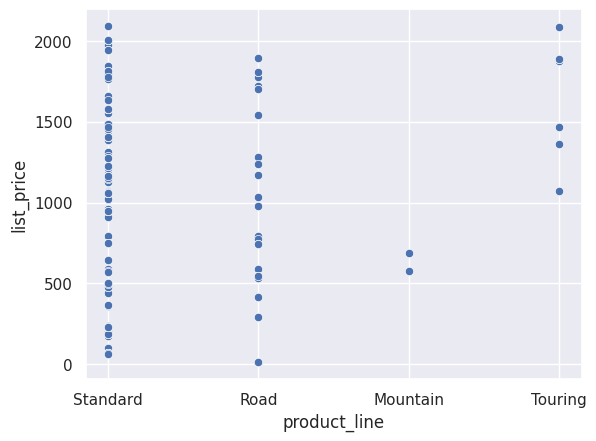

In [ ]:
sns.scatterplot(x="product_line", y="list_price", data=df)

**Costos por clase de producto**

**Hipotesis#2**
Los costos son directamente proporcionales a su clase de producto.
Clase de producto baja menor precio.
Clase de producto media precio promedio.
Clase de producto alta precio mayor.

**Análisis**: se puede observar cómo no se cumple la tesis debido a que notablemente la clase media es más vendida por ende tiene mayor variedad de costos, esto puede estar relacionado a la marca (más adelante se revisara), la clase baja mantiene unos costos estables, sin embargo, no son inferiores a las otras dos clases; por último, la clase alta si tiene la línea super de los costos más alta que los demás no es una gran diferencia respecto a las otras clases.





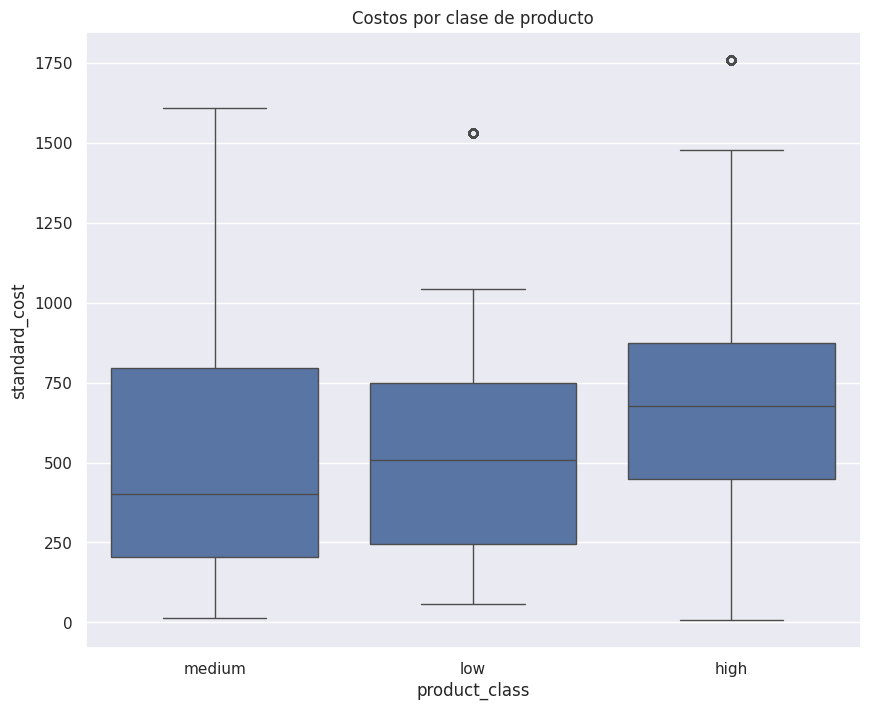

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.boxplot(x="product_class", y="standard_cost", data=df)
plt.title('Costos por clase de producto')
plt.xlabel('product_class')
plt.ylabel('standard_cost')

plt.show()

**Costos por marca y clase de producto vs Precios por marca y clase de producto**
**Hipótesis #3**
Las marcas y clases de productos más costosas serán las que tengan mayores precios porque su utilidad es directamente proporcional.

**Análisis**:
Se puede ver empezando por la marcar Solex que la hipótesis no se cumple dado que la clase de producto baja tiene un costo bajo sin embargo su precio final es  superior que el los productos de clase media con respecto a la clase media y alta tiene un nivel de ganancia similar, en esta marca sería más rentable dedicarse a la clase baja, siguiendo con la marca Trek Bicycles estaría más cerca de cumplir la hipótesis, los precios con respecto a clases es proporcionalmente superior a los costos, con respecto a la tercer marca OHM Cycles sucede lo mismo que con Solex con la clase baja  y la media también tiene un menor costo que  la alta y una mayor ganancia; para Giant Bicycles es la única marca que guarda las proporciones entre más alta la clase mayor su costo y su precio y viceversa, por ultimo WeareAZB solo maneja clase baja y media, en la clase media esta una diferencia grande entre su costo y su precio final, por otro lado la clase baja su costo con  respecto a su precio la diferencia es corta.


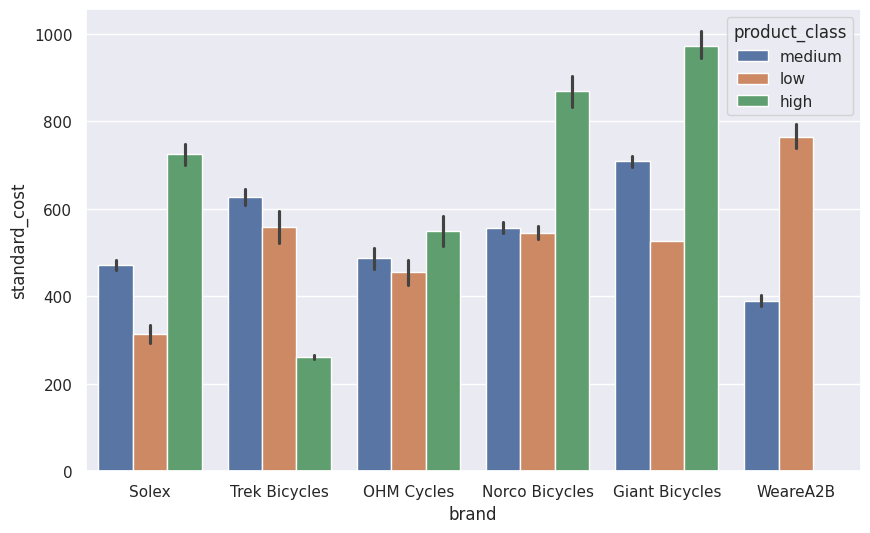

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(y='standard_cost',x='brand',hue='product_class',data=df);

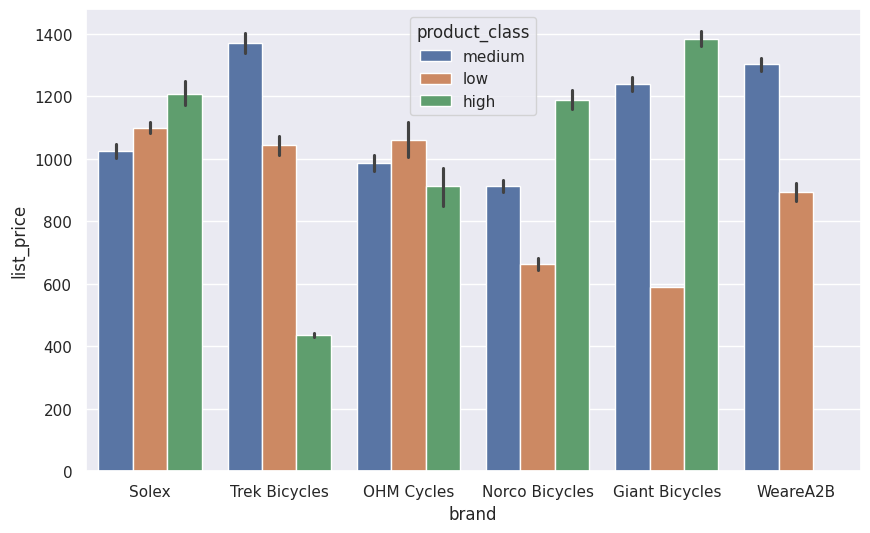

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(y='list_price',x='brand',hue='product_class',data=df);

**Tabla#1**
Esta tabla se realizó con el propósito de hacer un gráfico con la línea de tiempo relación precio y tipo de orden.


**Comparación costo vs precio por tipo de orden**

En los siguientes dos gráficos vemos en el transcurso del 2017 como fueron las ventas por tipo de orden para ventas online podemos guiarnos por la palabra 'TRUE' (línea azul), para las ventas en puntos físicos la identificamos con la palabra 'FALSE" (línea naranja), tuvieron un comportamiento muy similar en el mercado, no son mutuamente excluyentes y sus márgenes entre costo y precio son similares así que se puede inferir que lo mejor es continuar con ambos tipos de órdenes.


In [20]:
agg_df3=df[['transaction_date', 'online_order','standard_cost']].groupby(by=['transaction_date','online_order']).mean().reset_index()
agg_df3['transaction_date'] = pd.to_datetime(agg_df1['transaction_date'], format="%d/%m/%Y")
agg_df3['Date']=pd.to_datetime(agg_df1['transaction_date'])
agg_df3.head()

,transaction_date,online_order,standard_cost,Date
0,2017-01-01,False,544.648333,2017-01-01
1,2017-01-01,True,407.353750,2017-01-01
2,2017-02-01,False,433.873333,2017-02-01
3,2017-02-01,True,632.776552,2017-02-01
4,2017-03-01,False,424.069355,2017-03-01


Text(0.5, 1.0, 'Comparacion de costo por Tipo de orden online vs fisica')

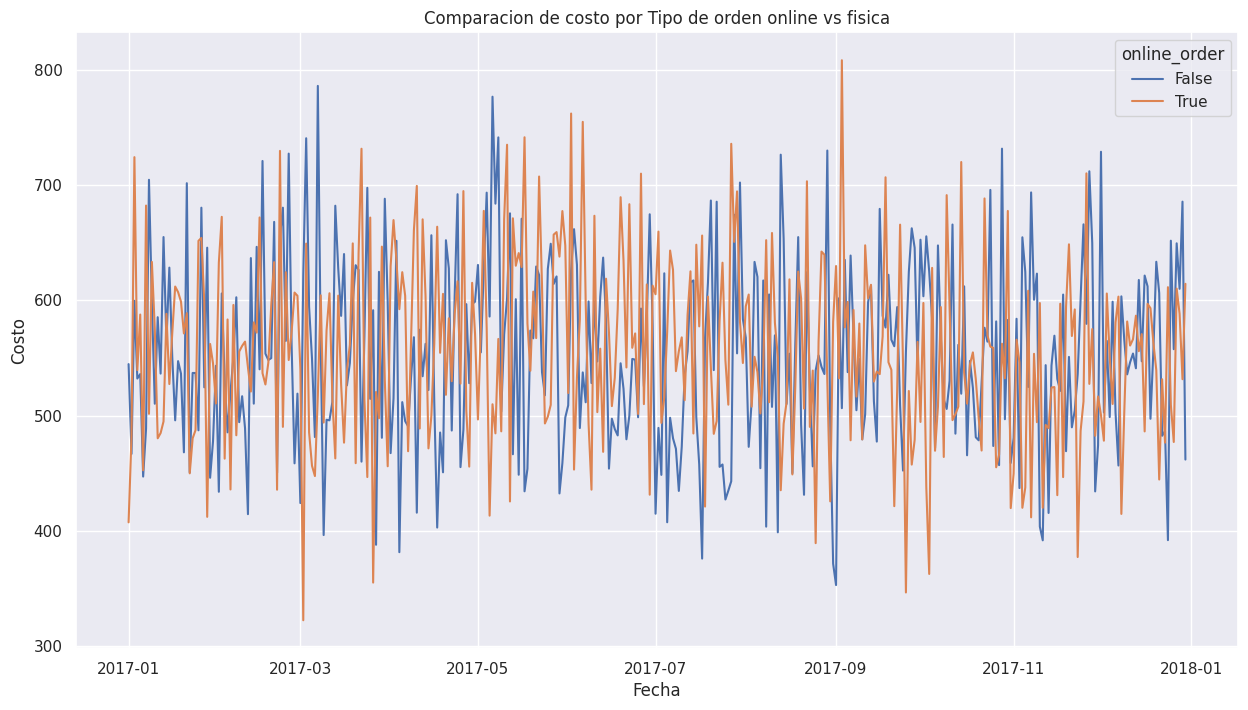

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.lineplot(x= agg_df3.transaction_date, y= agg_df3.standard_cost, hue=agg_df3.online_order)
plt.xlabel('Fecha')
plt.ylabel('Costo')
plt.title('Comparacion de costo por Tipo de orden online vs fisica')

**Tabla#2** Esta tabla se realizó con el objetivo de hacer un gráfico con la línea de tiempo relación costo y tipo de orden.

In [29]:
agg_df1=df[['transaction_date', 'online_order','list_price']].groupby(by=['transaction_date','online_order']).mean().reset_index()
agg_df1['transaction_date'] = pd.to_datetime(agg_df1['transaction_date'], format="%d/%m/%Y")
agg_df1['Date']=pd.to_datetime(agg_df1['transaction_date'])
agg_df1.head()

,transaction_date,online_order,list_price,Date
0,2017-01-01,False,1116.904333,2017-01-01
1,2017-01-01,True,1061.033750,2017-01-01
2,2017-02-01,False,985.059167,2017-02-01
3,2017-02-01,True,1101.594828,2017-02-01
4,2017-03-01,False,1094.252903,2017-03-01


Text(0.5, 1.0, 'Comparacion de Precio por Tipo de orden online vs fisica')

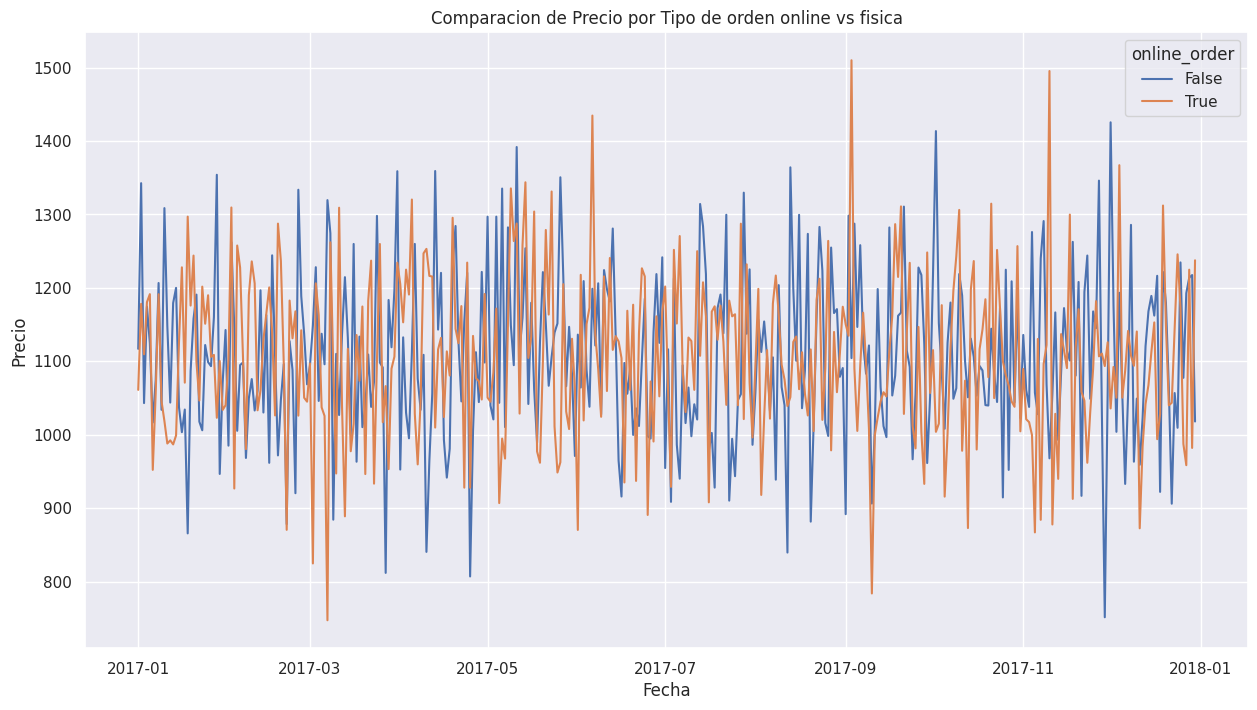

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.lineplot(x= agg_df1.transaction_date, y= agg_df1.list_price, hue=agg_df1.online_order)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Comparacion de Precio por Tipo de orden online vs fisica')

In [ ]:
agg_df2=df[['transaction_date', 'brand','list_price']].groupby(by=['transaction_date','brand']).mean().reset_index()
agg_df2['transaction_date'] = pd.to_datetime(agg_df1['transaction_date'], format="%d/%m/%Y")
agg_df2['Date']=pd.to_datetime(agg_df1['transaction_date'])
agg_df2.head()

,transaction_date,brand,list_price,Date
0,2017-01-01,Giant Bicycles,1231.990000,2017-01-01
1,2017-01-01,Norco Bicycles,722.672500,2017-01-01
2,2017-02-01,OHM Cycles,1119.796667,2017-02-01
3,2017-02-01,Solex,1174.340000,2017-02-01
4,2017-03-01,Trek Bicycles,881.210000,2017-03-01


**Comparación de los precios de las diferentes marcas a lo largo del año**

Los precios de las distintas marcas varían de manera similar en el transcurso del tiempo, la marca que sobre sale es Solex, en la cual se puede hacer enfasis para su promocion.




Text(0.5, 1.0, 'Comparacion de marca por Fecha')

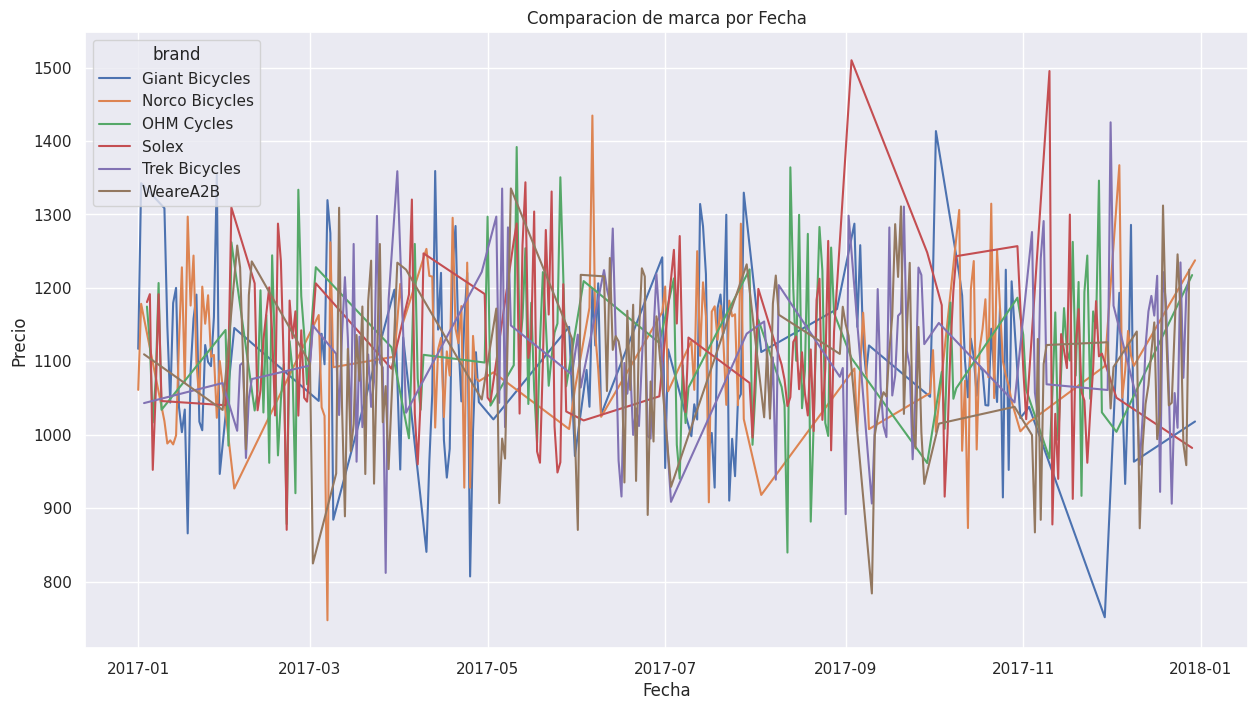

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.lineplot(x= agg_df2.transaction_date, y= agg_df1.list_price, hue=agg_df2.brand)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Comparacion de marca por Fecha')

**Comparación de costo por tipo de orden respecto a la talla del producto.**

**Hipotesis#4**
Los costos son directamente proporcionales con respecto a la talla del producto si la orden es en línea.

La hipótesis no se cumple no hay ninguna una diferencia notoria entre los costos de tipo de orden ya sea física o en línea respecto a la talla de producto de acuerdo al pairplot.


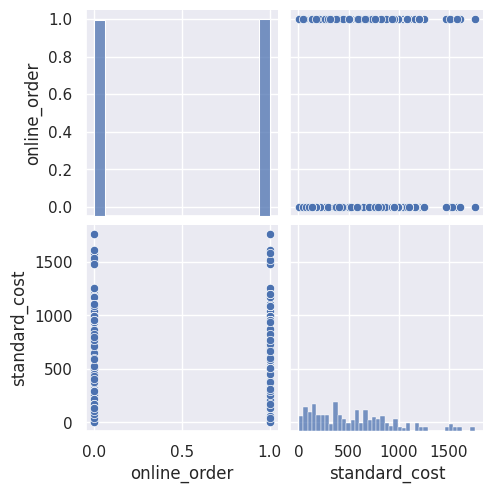

In [44]:
sns.pairplot(data = df[['online_order','standard_cost','product_size']])
